<a href="https://colab.research.google.com/github/Aaditya97735/Aaditya97735/blob/main/Football_Players_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('fifa_eda_stats.csv')
df.head()


Saving fifa_eda_stats.csv to fifa_eda_stats (5).csv


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


(18207, 57)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 

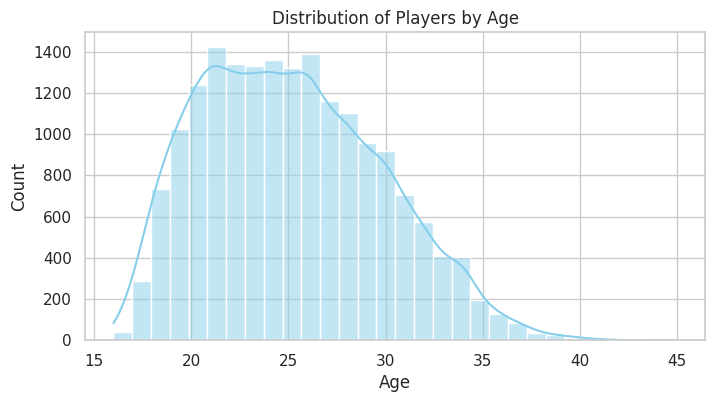

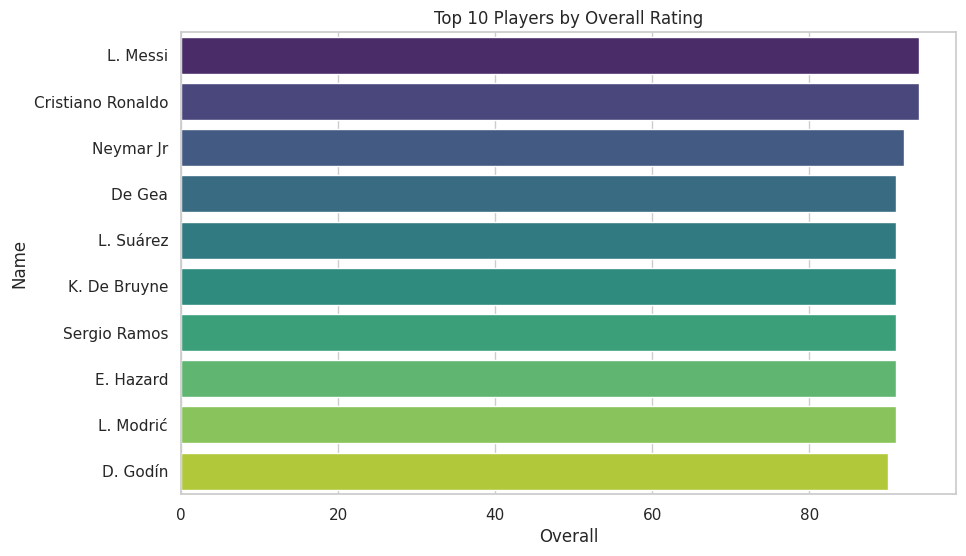

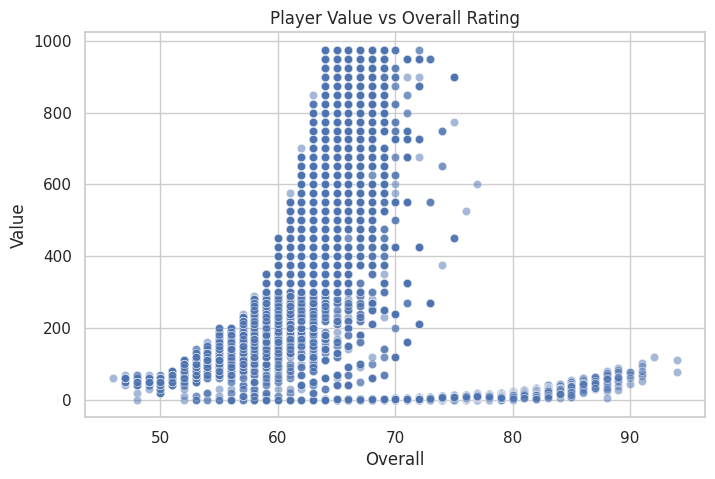

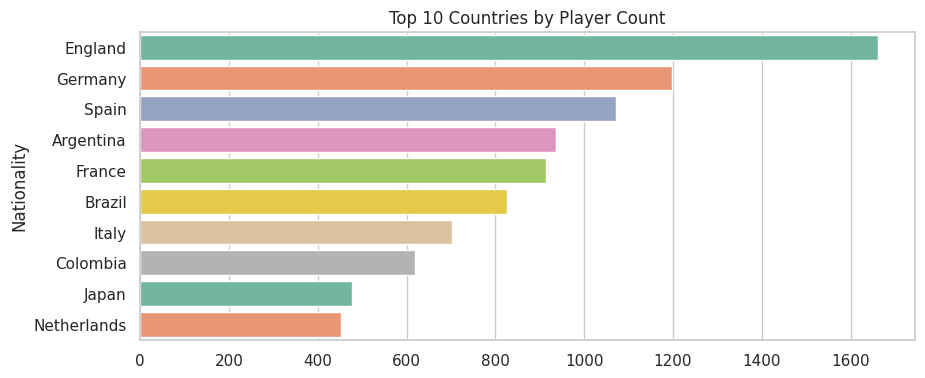

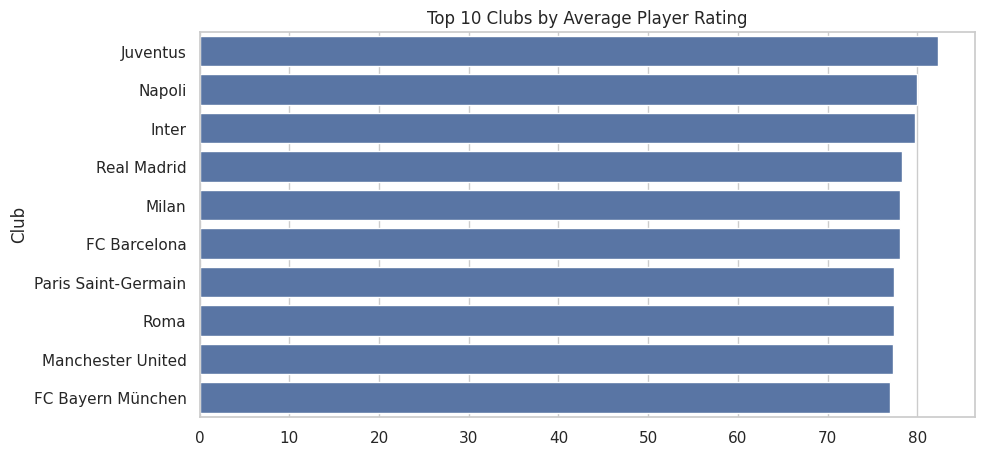

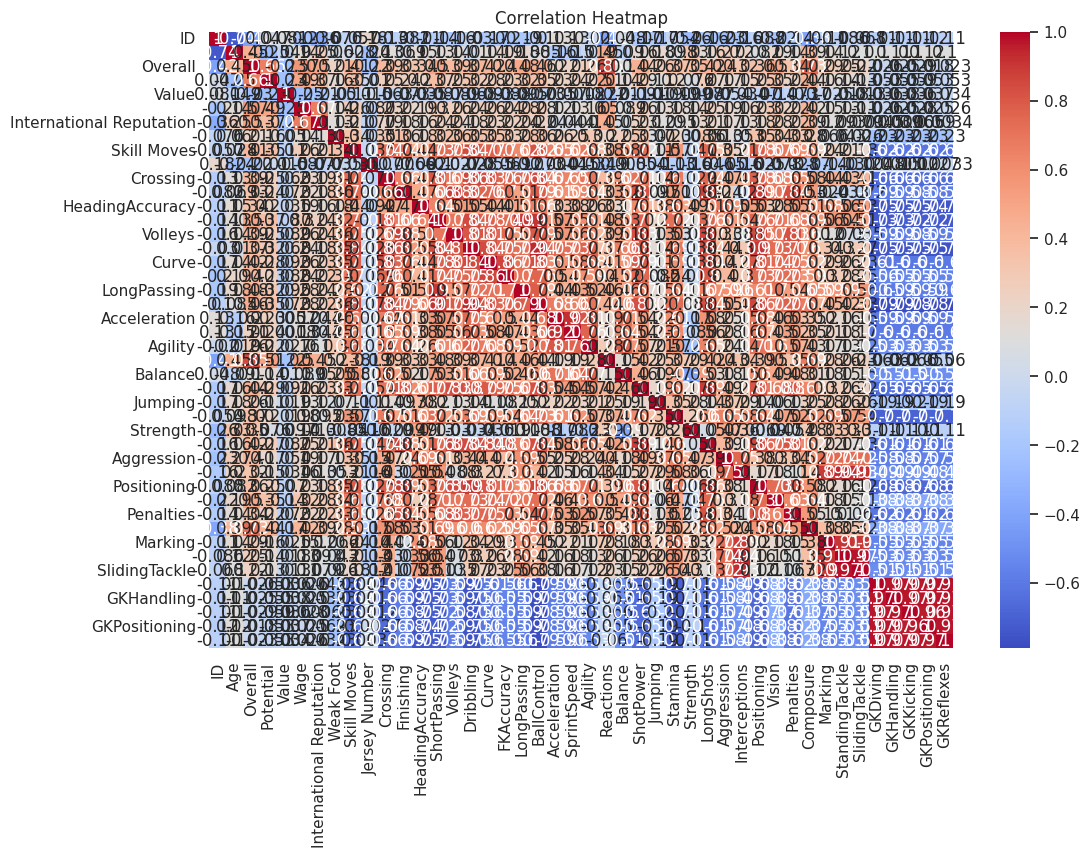

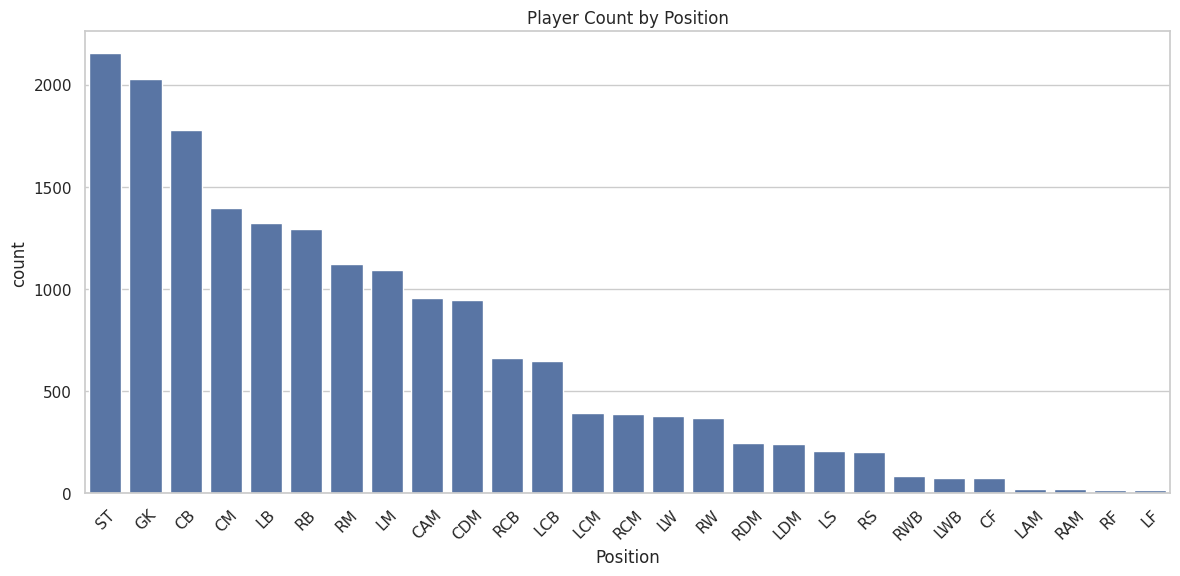

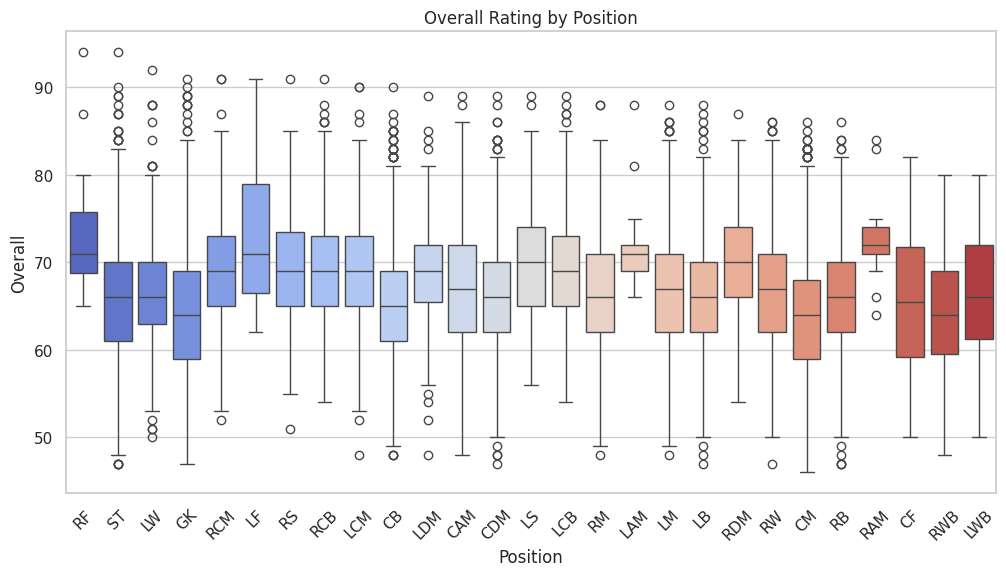

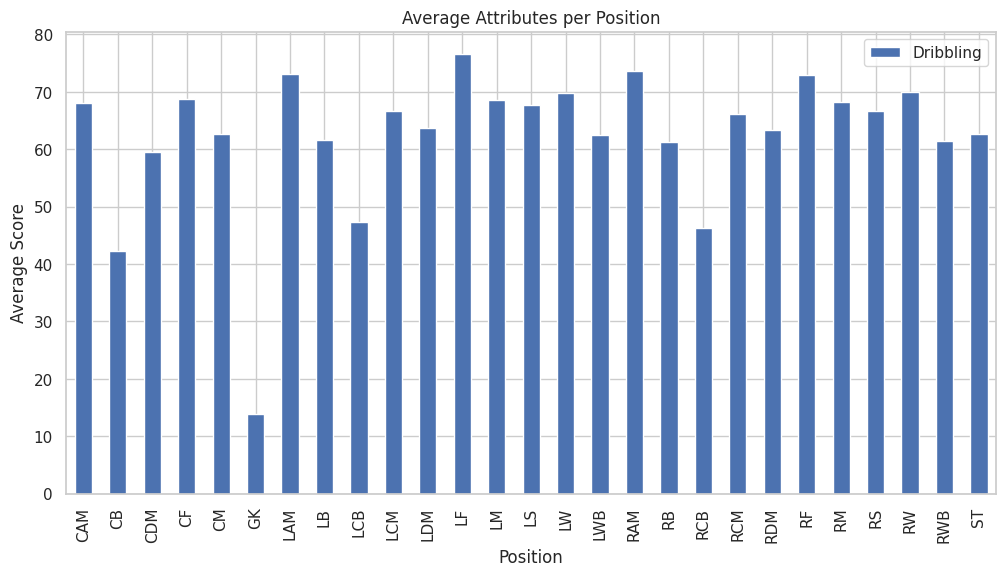

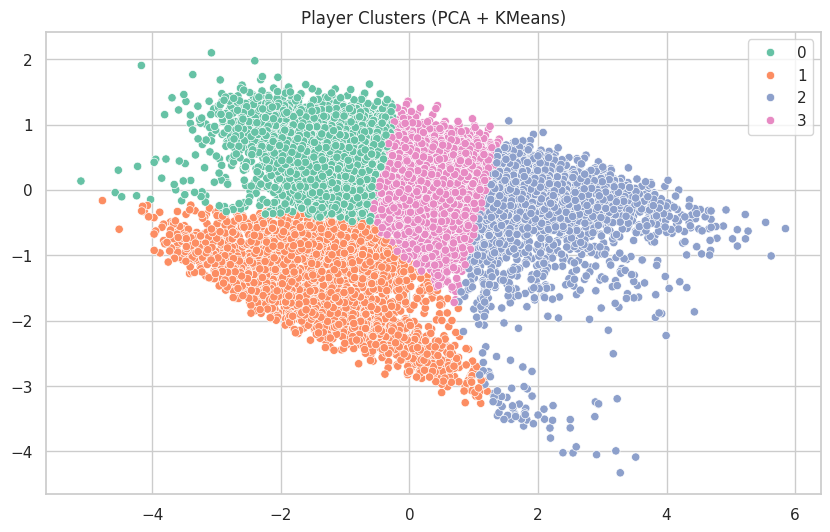

R² Score: 0.07
RMSE: 280.60


In [10]:
# Setup
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# 📌 Step 3: Data Overview
print(df.shape)
print(df.info())
print(df.describe())
print(df.columns)
print(df.isnull().sum())

# 📌 Step 4: Clean the Dataset
df = df.dropna(subset=['Overall', 'Age', 'Value', 'Wage'])  # Drop critical nulls
df = df.drop_duplicates()
df['Value'] = df['Value'].replace('[\€MKB]', '', regex=True).astype(float)
df['Wage'] = df['Wage'].replace('[\€KMB]', '', regex=True).astype(float)

# 📌 Step 5: Exploratory Data Analysis (EDA)

## 🎯 1. Age Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Players by Age')
plt.show()

## 🎯 2. Top 10 Rated Players
top_players = df.sort_values('Overall', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_players, x='Overall', y='Name', palette='viridis')
plt.title('Top 10 Players by Overall Rating')
plt.show()

## 🎯 3. Player Value vs Overall Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Overall', y='Value', alpha=0.5)
plt.title('Player Value vs Overall Rating')
plt.show()

## 🎯 4. Nationality Distribution
top_nations = df['Nationality'].value_counts().head(10)
plt.figure(figsize=(10, 4))
sns.barplot(x=top_nations.values, y=top_nations.index, palette='Set2')
plt.title('Top 10 Countries by Player Count')
plt.show()

## 🎯 5. Club-wise Average Ratings (Top 10)
club_ratings = df.groupby('Club')['Overall'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=club_ratings.values, y=club_ratings.index)
plt.title('Top 10 Clubs by Average Player Rating')
plt.show()

# 📊 Step 6: Additional Visualizations

## 🎯 6. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 🎯 7. Wage vs Value (Interactive)
fig = px.scatter(df, x='Value', y='Wage', color='Overall', hover_name='Name',
                 title='Wage vs Value Colored by Overall Rating')
fig.show()

## 🎯 8. Position-wise Distribution
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Position', order=df['Position'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Player Count by Position')
plt.show()

## 🎯 9. Age vs Overall by Position (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Position', y='Overall', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Overall Rating by Position')
plt.show()

## 🎯 10. Top Attributes by Position
attr_cols = ['Pace', 'Shooting', 'Passing', 'Dribbling']
existing = [col for col in attr_cols if col in df.columns]
if existing:
    position_attributes = df.groupby('Position')[existing].mean()
    position_attributes.plot(kind='bar', figsize=(12, 6))
    plt.title('Average Attributes per Position')
    plt.ylabel('Average Score')
    plt.show()

# 📌 Step 7: Player Clustering using KMeans

# Select features for clustering
cluster_features = ['Overall', 'Potential', 'Pace', 'Dribbling', 'Passing', 'Shooting']
available = [f for f in cluster_features if f in df.columns]
X = df[available].dropna()

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_clustered = df.loc[X.index].copy()
df_clustered['Cluster'] = clusters

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title('Player Clusters (PCA + KMeans)')
plt.show()

# 📌 Step 8: Predictive Modeling - Predicting Player Value
model_cols = ['Overall', 'Potential', 'Wage']
if all(col in df.columns for col in model_cols):
    model_df = df.dropna(subset=model_cols + ['Value'])
    X = model_df[model_cols]
    y = model_df['Value']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

# 📌 Step 9: Export Cleaned Dataset
df.to_csv('cleaned_fifa_data.csv', index=False)

